## Setup

In [1]:
import sys
from _path import workdir
sys.path.append(workdir)
print(sys.path)

['c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\python312.zip', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\DLLs', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys', '', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\win32', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\vince\\Downloads\\py-binary-orbit-main\\paper_QPE2005\\..']


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

from src.util.constants import G, msun, c
from src.orbit.mapping.orbele import itmap
from src.orbit.empirical.WDBH_EMRI import rWD, rtide, wf, olapf

## Calculate

In [3]:
mWD = 0.5*msun
mBH = 1e5*msun
Torb = 9.*3600
a_fixed = (G*(mBH+mWD)*(Torb/2/np.pi)**2)**(1./3)
rt = rtide(mWD,mBH)
rt_factor = 4.4

w_list1, olap_list1, ell_list1, m_list1 = [wf(mWD)], [olapf(mWD,0.5)], [2], [2]
w_list2, olap_list2, ell_list2, m_list2 = [], [], [], []

m1, r1 = mWD, rWD(mWD)
m2, r2 = mBH, 2*G*mBH/c**2

q10 = np.zeros(len(w_list1)*len(ell_list1)*len(m_list1))
q20 = np.zeros(len(w_list2)*len(ell_list2)*len(m_list2))

ntot = 800
ntot_2 = 150000

In [4]:
print(G*(m1+m2)/c**2/rt/rt_factor)

0.053993434450615364


## Output Plots

In [5]:
nlist_long = np.array([x for x in range(ntot)])

itsol_evol_long = itmap()
rp = rt_factor*rt
a0, e0, ga0 = a_fixed, 1-rp/a_fixed, 0.
itsol_evol_long.par = {'m1':m1, 'r1':r1, 'm2':m2, 'r2':r2\
            ,'a0':a0, 'e0':e0, 'ga0':ga0}
itsol_evol_long.flag_1pn = False
itsol_evol_long.flag_2_5pn = True
itsol_evol_long.flag_redshift = False
itsol_evol_long.flag_dq_cal = False
itsol_evol_long.flag_tide_reaction = True
itsol_evol_long.get_mode_1(w=w_list1,olap=olap_list1,ell=ell_list1,m=m_list1, q0 = q10)
itsol_evol_long.get_mode_2(w=w_list2,olap=olap_list2,ell=ell_list2,m=m_list2)

itsol_evol_long.map2(ntot)
itsol_evol_long.one_dphase()

period_list = 2*np.pi*np.sqrt(itsol_evol_long.an**3/G/(m1+m2))
dphase = wf(mWD)*np.abs(period_list-period_list[0])

mod_phase = np.mod(wf(mWD)*period_list, 2.*np.pi)

# Locate resonance positions
n_res = np.array([])
for i in range(len(mod_phase)-1):
    if mod_phase[i]<0.5 and mod_phase[i+1]>5.5:
        n_res = np.append(n_res,np.array([nlist_long[i]]))

# Calculate SPA
par = np.array([m1,r1,m2,r2\
                    ,a0,e0,ga0])
eta = m1*m2/(m1+m2)**2
dW = 96./5*eta*c**2/a0**2*(G*(m1+m2)/c**2/a0)**3.5*(1+73./24*e0**2+37./96*e0**4)/(1-e0**2)**3.5
dE_res = G*(m1+m2)*(m1/m2)/r1*np.abs(itsol_evol_long.get_dq_res(w_list1, olap_list1, ell_list1, m_list1,dW,0.))**2
print(dE_res/(G*(m1+m2)/2/a0))


[5.67602451e-09]


In [6]:
nlist_long_2 = np.array([x for x in range(ntot_2)])

itsol_evol_long_2 = itmap()
rp = rt_factor*rt
a0, e0, ga0 = a_fixed, 1-rp/a_fixed, 0.
itsol_evol_long_2.par = {'m1':m1, 'r1':r1, 'm2':m2, 'r2':r2\
            ,'a0':a0, 'e0':e0, 'ga0':ga0}
itsol_evol_long_2.flag_1pn = False
itsol_evol_long_2.flag_2_5pn = True
itsol_evol_long_2.flag_redshift = False
itsol_evol_long_2.flag_dq_cal = False
itsol_evol_long_2.flag_tide_reaction = True
itsol_evol_long_2.get_mode_1(w=w_list1,olap=olap_list1,ell=ell_list1,m=m_list1, q0 = q10)
itsol_evol_long_2.get_mode_2(w=w_list2,olap=olap_list2,ell=ell_list2,m=m_list2)

itsol_evol_long_2.map2(ntot_2)
itsol_evol_long_2.one_dphase()


<Figure size 640x480 with 0 Axes>

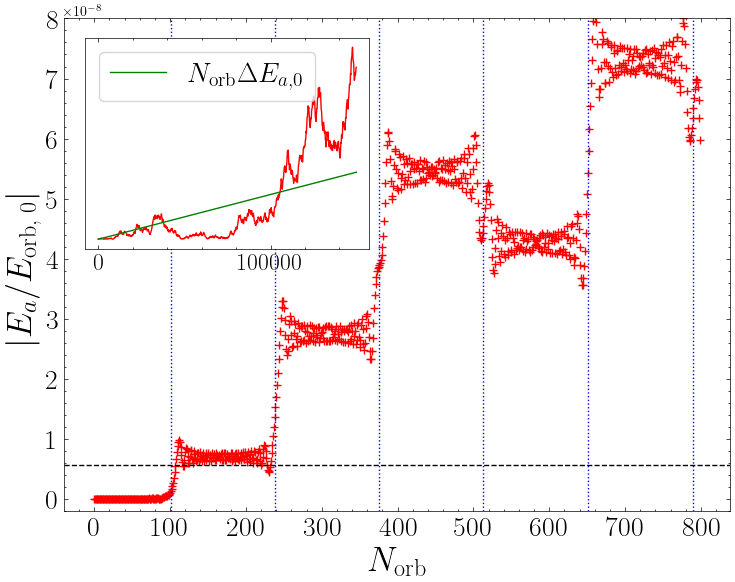

In [7]:

plt.figure()
plt.style.use('science')

fig, ax1 = plt.subplots(figsize=(8.6,6.4), dpi= 100)
ax1.plot(nlist_long, np.abs((itsol_evol_long.E1n+itsol_evol_long.E2n))/(G*(m1+m2)/2/a0), 'r+')
# ax1.plot(nlist_long, nlist_long*itsol_evol_long.E1n[1]/(G*(m1+m2)/2/a0), 'g-', label  = r'$N_\text{orb} \Delta E_0$')
# ax1.axhline(dE_res/(G*(m1+m2)/2/a0), color='black', linestyle = 'dashed', label = r'$\Delta E_\text{res}$ (SPA)' )
ax1.axhline(dE_res/(G*(m1+m2)/2/a0), color='black', linestyle = 'dashed')
# ax1.axvline(n_res[0], color = 'blue', linestyle = 'dashed', label = r'$\omega_a P = 2 k \pi$')
for nr in n_res:
    ax1.axvline(nr, color = 'blue', linestyle = 'dotted')
# ax1.legend(frameon = True, fontsize = 20)
ax1.set_xlabel(r'$N_\text{orb}$',fontsize=25)
ax1.set_ylabel(r'$|E_a/E_\text{orb, 0}|$',fontsize=25)
ax1.set_ylim([-2.e-9, 8.e-8])
# ax1.set_title(r'Mode energy, $T_\text{orb}$ = %1.2f'%(Torb/3600)+r'hr , $r_p = $ %1.2f'%(rt_factor)+r'$R_t$, $Gm/(c^2 r_p) =$ %1.3e'%(G*(m1+m2)/c**2/a0/(1-e0)))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


# Inset
# These are in unitless percentages of the figure size. (0,0 is bottom left)
nlist_2_plot = nlist_long_2[::200]
itsol_E_2_plot = np.abs((itsol_evol_long_2.E1n[::200]+itsol_evol_long_2.E2n[::200]))/(G*(m1+m2)/2/a0)
left, bottom, width, height = [0.15, 0.52, 0.33, 0.33]
ax2 = fig.add_axes([left, bottom, width, height])
# ax2.plot(nlist_long_2, np.abs((itsol_evol_long_2.E1n+itsol_evol_long_2.E2n))/(G*(m1+m2)/2/a0), 'r+', markersize = 1.)
# ax2.plot(nlist_long_2, nlist_long_2*itsol_evol_long_2.E1n[1]/(G*(m1+m2)/2/a0), 'g-', label  = r'$N_\text{orb} \Delta E_0$')
ax2.plot(nlist_2_plot, itsol_E_2_plot, 'r-')
ax2.plot(nlist_2_plot, nlist_2_plot*itsol_evol_long_2.E1n[1]/(G*(m1+m2)/2/a0), 'g-', label  = r'$N_\text{orb} \Delta E_{a, 0}$')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticks([0, 100000])
ax2.set_yticks([])
plt.xticks(fontsize = 17)

plt.legend(frameon = True, fontsize = 20)
plt.savefig("Emode_vs_Norb.pdf", format="pdf")
plt.show()
plt.close()

In [8]:
# plt.figure(figsize=(8.6,6.4), dpi= 100)
# plt.style.use('science')
# plt.plot(nlist_long, np.abs((itsol_evol_long.an-a0))/a0, 'r+')
# plt.xlabel(r'$N_\text{orb}$',fontsize=25)
# plt.ylabel(r'$|\Delta E_\text{orb}/E_\text{orb, 0}|$',fontsize=25)
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)
# plt.show()
# plt.close()